# COMP3222/6246 Machine Learning Technologies (2018/19)
## Week 4 – Linear regression, polynomial regression and Support Vector Machines

In the first lab, you implemented a simple linear regression algorithm. Despite its simplicity, this algorithm is quite powerful and can fulfill many of your ML needs. It is not surprising, then, that ML researchers have come up with all sorts of tricks to make it even more effective. In this lab, we have a look at a number of them. However, let us revise the basic model first.

## 1. Vanilla linear regression
For the sake of reproducibility, let us set the seed of the random generator:


In [1]:
import numpy as np

# make numpy randomisation predictable
np.random.seed(0)

Then, let us import the Boston house price dataset included in the scikit library:

In [3]:
from sklearn.datasets import load_boston

# load dataset
boston = load_boston()

And split the dataset in two: 80% training set and 20% test set. It sounds familiar, doesn't it?

In [4]:
# partition the dataset into training and test sets
rnd_indices = np.random.permutation(boston.data.shape[0])
train_size = int(boston.data.shape[0] * 0.8)
train_indices = rnd_indices[:train_size]
test_indices = rnd_indices[train_size:]

train_data = boston.data[train_indices, :]
test_data = boston.data[test_indices, :]
train_target = boston.target[train_indices]
test_target = boston.target[test_indices]

*Exercise 1.1.* As a quick warm-up, modify the following code to print the fifth and sixth feature.

0.62739


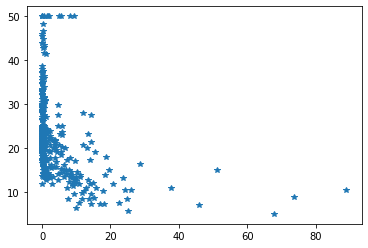

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_data[:,0], train_target, "*")

#print (train_data[:,0][5])

print (train_data[6])





Finally, it is time to train our linear regression model:

In [13]:
from sklearn.linear_model import LinearRegression

# fit a linear regressor
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Exercise 1.2.* Modify the following code to print both the training and the testing RMSE.

In [19]:
train_predict = lin_reg.predict(train_data)
test_predict = lin_reg.predict(test_data)
train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_RMSE = np.sqrt(((test_target - test_predict) ** 2).mean())
print(train_rmse)
print(test_RMSE)


4.854290583096463
4.060118093883479


## 2. Feature scaling
The first trick we look at is a data cleaning technique, and quite a general one. Before feeding the training set to your favourite ML algorithm, it is good practice to normalise the input features. This means scaling them so that their values fall more or less in the same range. The scikit library offers two different scaling methods: min-max scaling, and standard scaling.

*Exercise 2.1.* What do this methods do (explain in 1-2 sentences)? Hint: just google the name of the method and browse the scikit documentation!

Let us pick the standard scaling method and write some sample code:

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

*Exercise 2.2.* Modify the code above to print the eleventh feature before and after the transformation.

*Exercise 2.3.* Retrain the vanilla linear regressor on the scaled training set and make prediction on the (scaled) test set. Print the RMSE on training and test set.

## 3. Regularised linear models
ML algorithms are affected by noise and outliers. On top of that, the model we are using might be too powerful for the problem at hand, and end up overfitting. In order to avoid this, we can constrain the result of our learning effort, and avoid choosing extreme values for the weights of our model. This is called *regularisation* and finds many applications across the ML spectrum.

Here, we look at two alternatives for our linear model: *Ridge* regression and *Lasso* regression.

Coding them in scikit is quite easy. Here is an example:

In [0]:
# fit a ridge regressor
alpha_ridge = 1
ridge_reg = Ridge(alpha_ridge, solver="cholesky")
ridge_reg.fit(train_data, train_target)

# fit a lasso regressor
alpha_lasso = 1
lasso_reg = Lasso(alpha_lasso)
lasso_reg.fit(train_data, train_target)

*Exercise 3.1.* Compare the training and test RMSE for the Ridge, Lasso and vanilla linear regressors on the Boston house price dataset (no feature scaling).

*Exercise 3.2.* Do the results change much if we scale the input features beforehand (compare the RMSE in both cases)?

*Exercise 3.3.* What is the best value of alpha_ridge and alpha_lasso (for simplicity use the test set as a validation set)?

## 4. Support Vector Machines (for regression)
Support Vector Machines (SVM) can be used not only for classification but also for regression! Furthermore, they already provide an implicit way of regularising the result by changing the width of the margin epsilon.

*Exercise 4.1.* Modify the code below to train a SVM regressor on the Boston house price dataset. Print the training and test RMSE.

In [0]:
# fit a support vector machine regressor
epsilon_svm = 1
svm_reg = LinearSVR(epsilon_svm)
svm_reg.fit(train_data, train_target)

*Exercise 4.2.* What value of epsilon gives you the best performance (for simplicity use the test set as a validation set)?

## 5. Polynomial regression
Linear regression is all well and good, but sometimes the dataset requires a non-linear model. In this regard, the ML literature offers quite a range of non-linear regression algorithm. Here we look at the simplest one, *polynomial* regression.

Before, implementing the algorithm, let us create a synthetic dataset:

In [0]:
n = 100
data = 12 * np.random.rand(n, 1) - 3.9
target = 0.09 * (data**3) + 0.3 * (data**2) - 4.1 * data - 2.4 + 4.79 * np.random.randn(n, 1)

*Exercise 5.1.* Plot the dataset.

*Exercise 5.2.* Why would a linear model be a poor choice in this case (explain in 1-2 sentences)?

The idea behind polynomial regression is to expand the number of input features. We do so by taking the existing ones, and multiplying them by one another. More formally, we create an arbitrary number of polynomials of the given input features.

Fortunately, the scikit package allows us to implement this in a few lines of code:

In [0]:
# fit a quadratic regressor
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train_data = poly_features.fit_transform(train_data)
lin_reg = LinearRegression()
lin_reg.fit(poly_train_data, train_target)

The code above creates *quadratic* features, i.e. polynomials of degree two. If we need an even more powerful model, we can choose higher degrees. Of course, this will create an increasingly large number of extra features, and exposes us to overfitting. However, sometimes it is worth the effort.

*Exercise 5.3.* Which line of the code above you need to change to implement cubic regression (report the modified line)?

*Exercise 5.4* Train both Ridge and Lasso regressions and compare the training and test RMSE with the vanilla linear regression shown above.

Finally, we can modify our SVM code to do polynomial regression. Notice that the SVM takes as input the regular features and manipulates them with a polynomial kernel:

In [0]:
svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg.fit(train_data, np.ravel(train_target))

*Exercise 5.5* Plot the original dataset as in Exercise 5.1, but add the predictions of the four models (vanilla linear, Ridge, Lasso and SVM). Hint: you can modify the code below and print four separate plots.

In [0]:
plt.figure()
plt.plot(train_data, train_target, "*", train_data, lin_train_predict, ".", test_data, test_target, "*", test_data, lin_test_predict, ".")